# SQLite3: Análisis y Exploración de Datos del Dengue

## Instalación de paqueterias a utilizar

## Importación de librerias

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [15]:
# plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = (18,10)

## Lectura datos

Utilizaremos la librería pandas en Python para cargar el diccionario Catálogos_Dengue.xlsx y organizar sus datos en un diccionario. Cada hoja del archivo se leera como un DataFrame de pandas y se guardara en el diccionario degue_dict, utilizando el nombre de la hoja como llave. 

In [16]:
with pd.ExcelFile(r"./Catálogos_Dengue.xlsx") as xls:  
    degue_dict = {}
    for sheet in xls.sheet_names:
        degue_dict[sheet] = pd.read_excel(xls, sheet_name=sheet)  

A continuación podemos observar las llaves del diccionario las cuales pertenecen a cada una de las sheets del archivo excel

Ahora leeremos el archivo *dengue_abierto.csv* :

In [17]:
dengue_abierto_df = pd.read_csv(r"data/dengue_abierto.csv")

In [18]:
dengue_abierto_df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'SEXO', 'EDAD_ANOS',
       'ENTIDAD_RES', 'MUNICIPIO_RES', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'ENTIDAD_UM_NOTIF', 'MUNICIPIO_UM_NOTIF', 'INSTITUCION_UM_NOTIF',
       'FECHA_SIGN_SINTOMAS', 'TIPO_PACIENTE', 'HEMORRAGICOS', 'DIABETES',
       'HIPERTENSION', 'ENFERMEDAD_ULC_PEPTICA', 'ENFERMEDAD_RENAL',
       'INMUNOSUPR', 'CIRROSIS_HEPATICA', 'EMBARAZO', 'DEFUNCION', 'DICTAMEN',
       'TOMA_MUESTRA', 'RESULTADO_PCR', 'ESTATUS_CASO', 'ENTIDAD_ASIG',
       'MUNICIPIO_ASIG'],
      dtype='object')

In [19]:
dengue_abierto_df.shape

(202762, 28)

In [20]:
dengue_abierto_df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-10-23,1004648,1,17,23,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
1,2023-10-23,1004661,2,25,23,5,2,2,23,5,...,2,2,2,2,5.0,1,5,3,23,5
2,2023-10-23,1004693,2,8,19,21,2,2,19,21,...,2,2,2,2,5.0,1,5,3,19,21
3,2023-10-23,1004728,1,64,25,1,2,2,25,1,...,2,2,2,2,5.0,1,5,3,25,1
4,2023-10-23,1004754,1,30,6,2,2,2,6,2,...,2,2,2,2,5.0,1,5,3,6,2


Este dataframe cuenta con 28 columnas y 244,510 registros. Del total de columnas solo dos son tipo *objeto*, una sola como *float64* y el resto como enteros.

## Creación base de datos sqlite

Comenzamos creando la base de datos a la cual llamaremos *dengue.db* y su cursor para proceder a realizar los querys para visualizar nuetros datos.

In [60]:
conn = sqlite3.connect('dengue.db') #este va a ser el nombre de la base de datos
cursor = conn.cursor()

Guardamos nuestros datos anteriormente leidos del archivo *dengue_abierto.csv* que se encuentran en el dataframe *df* y los guardamos en nuestra base de datos

In [22]:
#cargamos la tabla principal a la base de datos con nombre dengue_abierto
dengue_abierto_df.to_sql('dengue_abierto', conn, index=False, if_exists='replace')

202762

Ahora procederemos a guardar nuestros catalogos en la base de datos como tablas, para esto es necesario eliminar espacios en cada catalogo.

In [23]:
degue_dict['CATÁLOGO ENTIDAD'].sample(5)

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
32,33,ESTADOS UNIDOS DE AMERICA,USA
35,97,NO APLICA,97
3,4,CAMPECHE,CC
37,99,NO ESPECIFICADO,99
25,26,SONORA,SR


In [24]:
#cargamos los catalogos como tablas, quitando los espacios
catalogos_list = list(degue_dict.keys())
catalogos_list = [key.replace(' ', '_') for key in catalogos_list]

for i, catalogo in enumerate(degue_dict.keys()):
    degue_dict[catalogo].to_sql(catalogos_list[i], conn, index=False, if_exists='replace')

## Visualización de datos 

### Decodificamos las variables de la tabla dengue_abierto utilizando SQL

In [25]:
#columnas a mantener de tabla de dengue
columns_t1 = list(dengue_abierto_df.columns) # Todas las etiquetas de las columnas

# Eliminamos todas los nombres de las siguientes columnas de nuestra lista
columns_t1.remove('SEXO') 
columns_t1.remove('ENTIDAD_RES')
columns_t1.remove('ENTIDAD_UM_NOTIF')
columns_t1.remove('ENTIDAD_ASIG')

# Le agregamos el prefijo t1 a cada nombre de columna que se encuentran en la lista y los unimos usando comas mediante la funcion join()
# Esto con el propodito de tener todas las columnas que nos intereesan de la tabla a la que le asignaremos el alias t1
columns_t1 = 't1.' + ', t1.'.join(columns_t1) 
columns_t1


't1.FECHA_ACTUALIZACION, t1.ID_REGISTRO, t1.EDAD_ANOS, t1.MUNICIPIO_RES, t1.HABLA_LENGUA_INDIG, t1.INDIGENA, t1.MUNICIPIO_UM_NOTIF, t1.INSTITUCION_UM_NOTIF, t1.FECHA_SIGN_SINTOMAS, t1.TIPO_PACIENTE, t1.HEMORRAGICOS, t1.DIABETES, t1.HIPERTENSION, t1.ENFERMEDAD_ULC_PEPTICA, t1.ENFERMEDAD_RENAL, t1.INMUNOSUPR, t1.CIRROSIS_HEPATICA, t1.EMBARAZO, t1.DEFUNCION, t1.DICTAMEN, t1.TOMA_MUESTRA, t1.RESULTADO_PCR, t1.ESTATUS_CASO, t1.MUNICIPIO_ASIG'

In [26]:
#Creamos un query con los joins necesarios para decodificar las columnas SEXO, ENTIDAD_RES, ENTIDAD_UM_NOTIF, ENTIDAD_ASIG
# utilizando lso catalogos: CATÁLOGO_SEXO, CATÁLOGO_ENTIDAD
catalogo_sexo_entidad_query = f'''
                       SELECT {columns_t1}, 
                            DESCRIPCIÓN as SEXO, 
                            t3.ENTIDAD_FEDERATIVA as ENTIDAD_RES, 
                            t4.ENTIDAD_FEDERATIVA as ENTIDAD_UM_NOTIF, 
                            t5.ENTIDAD_FEDERATIVA as ENTIDAD_ASIG
                       FROM dengue_abierto as t1
                       LEFT JOIN CATÁLOGO_SEXO as t2
                       ON t1.SEXO = t2.CLAVE
                       LEFT JOIN CATÁLOGO_ENTIDAD as t3
                       ON t1.ENTIDAD_RES = t3.CLAVE_ENTIDAD
                       INNER JOIN CATÁLOGO_ENTIDAD as t4
                       ON t1.ENTIDAD_UM_NOTIF = t4.CLAVE_ENTIDAD
                       INNER JOIN CATÁLOGO_ENTIDAD as t5
                       ON t1.ENTIDAD_ASIG = t5.CLAVE_ENTIDAD
                       '''



# Ejecutamos nuestro query utilizando nuestro cursor en pandas para convertir nuestra información a un dataframe
df_decodificado = pd.read_sql_query(catalogo_sexo_entidad_query, conn)
df_decodificado.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,EDAD_ANOS,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,MUNICIPIO_UM_NOTIF,INSTITUCION_UM_NOTIF,FECHA_SIGN_SINTOMAS,TIPO_PACIENTE,...,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,MUNICIPIO_ASIG,SEXO,ENTIDAD_RES,ENTIDAD_UM_NOTIF,ENTIDAD_ASIG
0,2023-10-23,1004648,17,5,2,2,5,4,2023-01-24,1,...,2,5.0,1,3,2,5,MUJER,QUINTANA ROO,QUINTANA ROO,QUINTANA ROO
1,2023-10-23,1004661,25,5,2,2,5,4,2023-01-23,1,...,2,5.0,1,5,3,5,HOMBRE,QUINTANA ROO,QUINTANA ROO,QUINTANA ROO
2,2023-10-23,1004693,8,21,2,2,21,12,2023-01-23,1,...,2,5.0,1,5,3,21,HOMBRE,NUEVO LEÓN,NUEVO LEÓN,NUEVO LEÓN
3,2023-10-23,1004728,64,1,2,2,1,6,2023-01-20,2,...,2,5.0,1,5,3,1,MUJER,SINALOA,SINALOA,SINALOA
4,2023-10-23,1004754,30,2,2,2,2,12,2023-01-21,1,...,2,5.0,1,5,3,2,MUJER,COLIMA,COLIMA,COLIMA


# Combinar tablas usando Pandas
## Decodificamos las variables de dengue_abierto_df

In [27]:
# Creamos un nuevo dataframe de la union del dataframe dengue_abierto_df y el catalogo degue_dict["CATÁLOGO SEXO"] utilizando como claves de union
# la columna SEXO de dengue_abierto_df y la columna CLAVE del catalogo.
df_data_sexo = dengue_abierto_df.merge(degue_dict["CATÁLOGO SEXO"], left_on="SEXO", right_on="CLAVE")

# Le asignamos el valor de la columna DESCRIPCIÓN a la columna SEXO ya que una es la codificacion de la otra
df_data_sexo["SEXO"] = df_data_sexo["DESCRIPCIÓN"]

# Eliminamos las columnas que ya no necesitamos
df_data_sexo = df_data_sexo.drop(columns=["DESCRIPCIÓN", "CLAVE"])

df_data_sexo.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-10-23,1004648,MUJER,17,23,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
1,2023-10-23,1004728,MUJER,64,25,1,2,2,25,1,...,2,2,2,2,5.0,1,5,3,25,1
2,2023-10-23,1004754,MUJER,30,6,2,2,2,6,2,...,2,2,2,2,5.0,1,5,3,6,2
3,2023-10-23,1004789,MUJER,22,30,39,2,2,30,39,...,2,2,2,2,5.0,2,5,1,30,39
4,2023-10-23,1004805,MUJER,28,23,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5


Ahora procedemos a combinar la Entidad

In [28]:
# Creamos un nuevo dataframe de la union del dataframe df_data_sexo y el catalogo CATÁLOGO ENTIDAD utilizando como claves de union
# la columna ENTIDAD_RES de df_data_sexo y la columna CLAVE_ENTIDAD del catalogo.
df_data_entres = df_data_sexo.merge(degue_dict["CATÁLOGO ENTIDAD"], left_on="ENTIDAD_RES", right_on="CLAVE_ENTIDAD")

# Le asignamos el valor de la columna ENTIDAD_FEDERATIVA a la columna ENTIDAD_RES ya que una es la codificacion de la otra
df_data_entres["ENTIDAD_RES"] = df_data_entres["ENTIDAD_FEDERATIVA"]

# Eliminamos las columnas que ya no necesitamos
df_data_entres = df_data_entres.drop(columns=["CLAVE_ENTIDAD", "ENTIDAD_FEDERATIVA", "ABREVIATURA"])

df_data_entres.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-10-23,1004648,MUJER,17,QUINTANA ROO,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
1,2023-10-23,1004805,MUJER,28,QUINTANA ROO,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5
2,2023-10-23,1005021,MUJER,38,QUINTANA ROO,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5
3,2023-10-23,1005024,MUJER,28,QUINTANA ROO,5,2,2,23,999,...,2,2,2,2,5.0,2,5,1,23,5
4,2023-10-23,1005030,MUJER,64,QUINTANA ROO,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5


Ahora combinamos a la ENTIDAD_UM_NOTIF

In [29]:
# Creamos un nuevo dataframe de la union del dataframe df_data_entres y el CATÁLOGO ENTIDAD utilizando como claves de union
# la columna ENTIDAD_UM_NOTIF de df_data_entres y la columna CLAVE_ENTIDAD del catalogo.
df_data_ent_info = df_data_entres.merge(degue_dict["CATÁLOGO ENTIDAD"], left_on="ENTIDAD_UM_NOTIF", right_on="CLAVE_ENTIDAD")

# Le asignamos el valor de la columna ENTIDAD_FEDERATIVA a la columna ENTIDAD_UM_NOTIF ya que una es la codificacion de la otra
df_data_ent_info["ENTIDAD_UM_NOTIF"] = df_data_ent_info["ENTIDAD_FEDERATIVA"]

# Eliminamos las columnas que ya no necesitamos
df_data_ent_info = df_data_ent_info.drop(columns=["CLAVE_ENTIDAD", "ENTIDAD_FEDERATIVA", "ABREVIATURA"])
df_data_ent_info.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-10-23,1004648,MUJER,17,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,1,3,2,23,5
1,2023-10-23,1004805,MUJER,28,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,2,5,1,23,5
2,2023-10-23,1005021,MUJER,38,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,2,5,1,23,5
3,2023-10-23,1005024,MUJER,28,QUINTANA ROO,5,2,2,QUINTANA ROO,999,...,2,2,2,2,5.0,2,5,1,23,5
4,2023-10-23,1005030,MUJER,64,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,2,5,1,23,5


Por ultimo a la ENTIDAD_ASIG

In [30]:
# Creamos un nuevo dataframe de la union del dataframe df_data_ent_info y el CATÁLOGO ENTIDAD utilizando como claves de union
# la columna ENTIDAD_ASIG de df_data_ent_info y la columna CLAVE_ENTIDAD del catalogo.
df_data_ent_asign = df_data_ent_info.merge(degue_dict["CATÁLOGO ENTIDAD"], left_on="ENTIDAD_ASIG", right_on="CLAVE_ENTIDAD")

# Le asignamos el valor de la columna ENTIDAD_FEDERATIVA a la columna ENTIDAD_ASIG ya que una es la codificacion de la otra
df_data_ent_asign["ENTIDAD_ASIG"] = df_data_ent_asign["ENTIDAD_FEDERATIVA"]

# Eliminamos las columnas que ya no necesitamos
df_data_ent_asign = df_data_ent_asign.drop(columns=["CLAVE_ENTIDAD", "ENTIDAD_FEDERATIVA", "ABREVIATURA"])

df_data_ent_asign.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-10-23,1004648,MUJER,17,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,1,3,2,QUINTANA ROO,5
1,2023-10-23,1004805,MUJER,28,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,2,5,1,QUINTANA ROO,5
2,2023-10-23,1005021,MUJER,38,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,2,5,1,QUINTANA ROO,5
3,2023-10-23,1005024,MUJER,28,QUINTANA ROO,5,2,2,QUINTANA ROO,999,...,2,2,2,2,5.0,2,5,1,QUINTANA ROO,5
4,2023-10-23,1005030,MUJER,64,QUINTANA ROO,5,2,2,QUINTANA ROO,5,...,2,2,2,2,5.0,2,5,1,QUINTANA ROO,5


In [31]:
degue_dict["CATALOGO SI_NO"]

,CLAVE,DESCRIPCIÓN
0,1,SI
1,2,NO


In [32]:
# SI_NO es una lista de columnas que nomas tienen valores 1 o 2
SI_NO = ["HABLA_LENGUA_INDIG", "INDIGENA", "HEMORRAGICOS", 
         "DIABETES", "HIPERTENSION", "ENFERMEDAD_ULC_PEPTICA",
         "ENFERMEDAD_RENAL", "INMUNOSUPR", "CIRROSIS_HEPATICA",
         "EMBARAZO", "DEFUNCION", "TOMA_MUESTRA"]

# Tomamos una copia del ultimo dataframe que contiene los datos
df_sino = df_data_ent_asign.copy()


# Sustituimos los valores 1's y 0's por el valor que les corresponde utilizando el "CATALOGO SI_NO"
for col in SI_NO:
    df_sino = df_sino.merge(degue_dict["CATALOGO SI_NO"], left_on=col, right_on="CLAVE")
    df_sino[col] = df_sino["DESCRIPCIÓN"]
    df_sino = df_sino.drop(columns=["CLAVE", "DESCRIPCIÓN"])

df_sino.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2023-10-23,1004648,MUJER,17,QUINTANA ROO,5,NO,NO,QUINTANA ROO,5,...,NO,NO,NO,NO,5.0,SI,3,2,QUINTANA ROO,5
1,2023-10-23,1005255,MUJER,6,QUINTANA ROO,5,NO,NO,QUINTANA ROO,5,...,NO,NO,NO,NO,5.0,SI,3,2,QUINTANA ROO,5
2,2023-10-23,1004715,MUJER,15,QUINTANA ROO,5,NO,NO,QUINTANA ROO,5,...,NO,NO,NO,NO,5.0,SI,5,2,QUINTANA ROO,5
3,2023-10-23,1004785,MUJER,33,QUINTANA ROO,5,NO,NO,QUINTANA ROO,5,...,NO,NO,NO,NO,5.0,SI,5,2,QUINTANA ROO,5
4,2023-10-23,1004991,MUJER,7,QUINTANA ROO,5,NO,NO,QUINTANA ROO,5,...,NO,NO,NO,NO,5.0,SI,5,2,QUINTANA ROO,5


### Cantidad de ID's de registros por entidad

<Axes: ylabel='ENTIDAD_UM_NOTIF'>

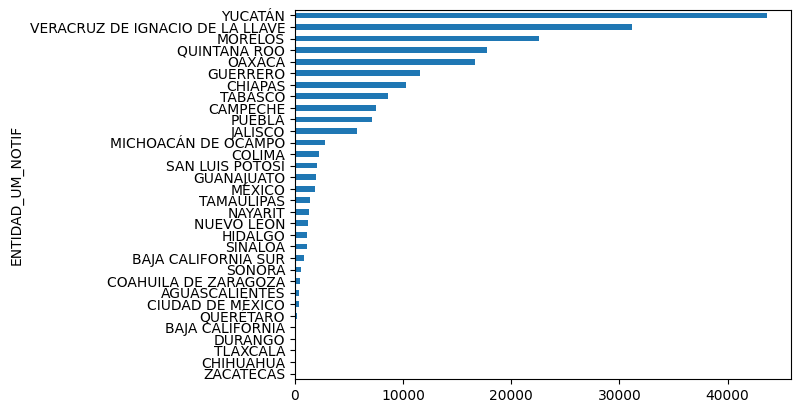

In [33]:
# Agrupamos nuestro dataframe final utilizando la columna ENTIDAD_UM_NOTIF y la cantidad de ID_REGISTRO por cada uno de estos
denge_x_entidad = df_sino.groupby("ENTIDAD_UM_NOTIF")["ID_REGISTRO"].count()
# Ordenamos los valores de mayor a menor y lo graficamos en forma de barras horizontales
denge_x_entidad.sort_values().plot(kind="barh")

# Ahora lo mismo usando SQL Query's

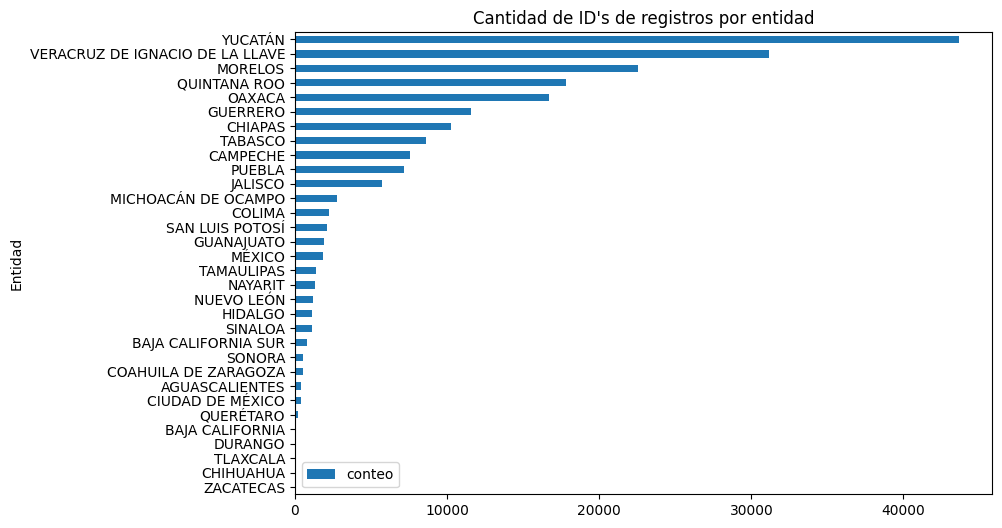

In [34]:
#Hecho con querie
fig, ax = plt.subplots(1,1,figsize = (9,6) )
querie_fome = '''
            SELECT COUNT(t1.ID_REGISTRO) as conteo, t2.ENTIDAD_FEDERATIVA
            FROM dengue_abierto as t1
            LEFT JOIN CATÁLOGO_ENTIDAD as t2
            ON t1.ENTIDAD_UM_NOTIF = t2.CLAVE_ENTIDAD
            GROUP BY ENTIDAD_UM_NOTIF
'''
df_vista = pd.read_sql_query(querie_fome, conn)
ax.set_title("Cantidad de ID's de registros por entidad")
df_vista.set_index('ENTIDAD_FEDERATIVA', drop = True).sort_values('conteo').plot(kind="barh", ax=ax);
ax.set_ylabel('Entidad');

Podemos visualizar que en Yucatán se encuentra la mayor cantidad de registros con casi 50,000 registros mientras que Zacatecas es el que menos tiene que al utilizar esta grafica podemos decir que se encuentra en ceros.

### Concentración de hombres y mujeres en años de edad

In [35]:

query_fome2 = '''
        SELECT t1.EDAD_ANOS, t1.ID_REGISTRO, t2.DESCRIPCIÓN as SEXO
        FROM dengue_abierto as t1
        LEFT JOIN CATÁLOGO_SEXO as t2
        ON t1.SEXO = t2.CLAVE    
'''
df_vista2 = pd.read_sql_query(query_fome2, conn)
df_vista2

,EDAD_ANOS,ID_REGISTRO,SEXO
0,17,1004648,MUJER
1,25,1004661,HOMBRE
2,8,1004693,HOMBRE
3,64,1004728,MUJER
4,30,1004754,MUJER
...,...,...,...
202757,20,1103456,MUJER
202758,55,1103463,MUJER
202759,22,1103479,MUJER
202760,23,1103482,HOMBRE


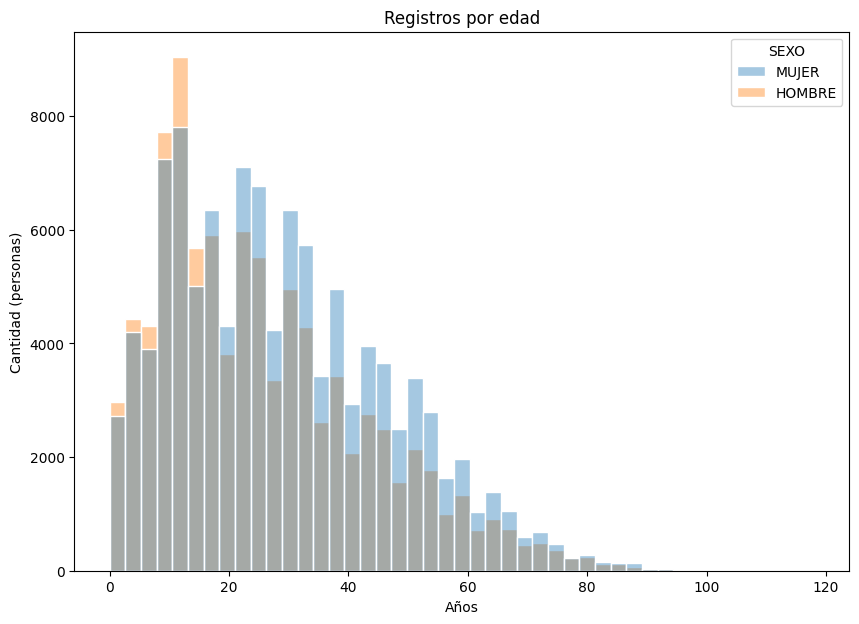

In [36]:
#Con sql
fig, ax = plt.subplots(1,1, figsize = (10,7))
sns.histplot(hue = 'SEXO', x = 'EDAD_ANOS', data = df_vista2, bins=45, alpha=0.4, legend=True, edgecolor = 'white', ax = ax);
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad (personas)')
ax.set_title('Registros por edad');

In [37]:
df_vista2.groupby('SEXO').size()

SEXO
HOMBRE     93677
MUJER     109085
dtype: int64

SEXO
HOMBRE    Axes(0.125,0.11;0.775x0.77)
MUJER     Axes(0.125,0.11;0.775x0.77)
Name: EDAD_ANOS, dtype: object

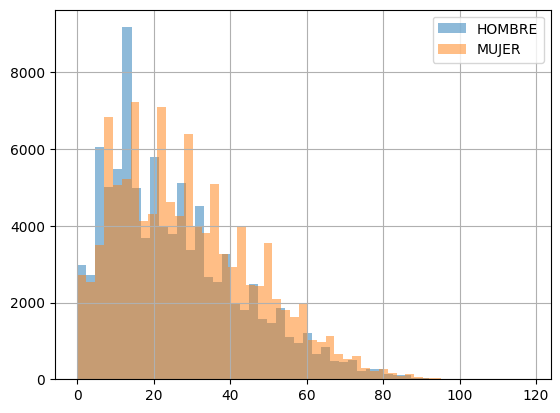

In [38]:
#Sin sql
df_sino.groupby("SEXO")["EDAD_ANOS"].hist(bins=50, alpha=0.5, legend=True)

## Estatus de casos en  México

In [39]:
query_estatus_caso = f''' 
            SELECT 
                CASE CATÁLOGO_ESTATUS_CASO.CLAVE  
                    WHEN 1 THEN 'Probable'
                    WHEN 2 THEN 'Confirmado'
                    WHEN 3 THEN 'Descartado' 
                END as ESTATUS_CASO,
                COUNT(*) as CANTIDAD -- Cantidad total de casos
            FROM 
                dengue_abierto
            INNER JOIN 
                CATÁLOGO_ESTATUS_CASO 
            ON 
                dengue_abierto.ESTATUS_CASO = CATÁLOGO_ESTATUS_CASO.CLAVE
            GROUP BY 
                CATÁLOGO_ESTATUS_CASO.CLAVE
             '''


# Ejecutamos nuestro query utilizando nuestro cursor en pandas para convertir nuestra información a un dataframe
query_estatus_caso = pd.read_sql_query(query_estatus_caso, conn)
query_estatus_caso.head()

,ESTATUS_CASO,CANTIDAD
0,Probable,125932
1,Confirmado,37452
2,Descartado,39378


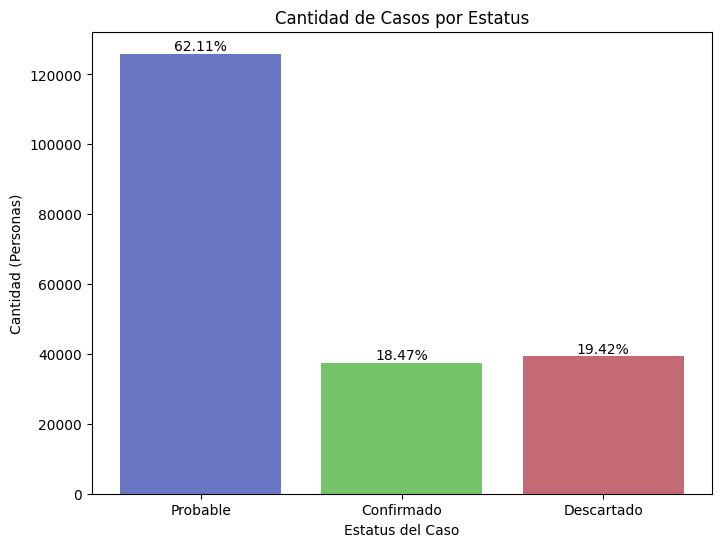

In [40]:
cantidad_total = query_estatus_caso['CANTIDAD'].sum()
query_estatus_caso['PORCENTAJE'] = (query_estatus_caso['CANTIDAD']*100)/cantidad_total

plt.figure(figsize=(8, 6))
bars  = plt.bar(query_estatus_caso['ESTATUS_CASO'], query_estatus_caso['CANTIDAD'], color=['#6976C4', '#76C469', '#C46976'])
plt.xlabel('Estatus del Caso')
plt.ylabel('Cantidad (Personas)')
plt.title('Cantidad de Casos por Estatus')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{query_estatus_caso['PORCENTAJE'][i]:.2f}%",
             ha='center', va='bottom', fontsize=10)

plt.show()

### Por Sexo

In [41]:
query_estatus_caso_sexo = f''' 
                            SELECT 
                                CASE CATÁLOGO_ESTATUS_CASO.CLAVE  
                                    WHEN 1 THEN 'Probable'
                                    WHEN 2 THEN 'Confirmado'
                                    WHEN 3 THEN 'Descartado' 
                                END as ESTATUS_CASO,
                                CATÁLOGO_SEXO.DESCRIPCIÓN as SEXO,
                                COUNT(*) as CANTIDAD -- Cantidad total de casos
                            FROM 
                                dengue_abierto
                            INNER JOIN 
                                CATÁLOGO_ESTATUS_CASO ON dengue_abierto.ESTATUS_CASO = CATÁLOGO_ESTATUS_CASO.CLAVE
                            INNER JOIN 
                                CATÁLOGO_SEXO ON dengue_abierto.SEXO = CATÁLOGO_SEXO.CLAVE
                            GROUP BY 
                                CATÁLOGO_ESTATUS_CASO.CLAVE, CATÁLOGO_SEXO.DESCRIPCIÓN

                            '''


# Ejecutamos nuestro query utilizando nuestro cursor en pandas para convertir nuestra información a un dataframe
query_estatus_caso_sexo = pd.read_sql_query(query_estatus_caso_sexo, conn)
query_estatus_caso_sexo.head()

,ESTATUS_CASO,SEXO,CANTIDAD
0,Probable,HOMBRE,59314
1,Probable,MUJER,66618
2,Confirmado,HOMBRE,16955
3,Confirmado,MUJER,20497
4,Descartado,HOMBRE,17408


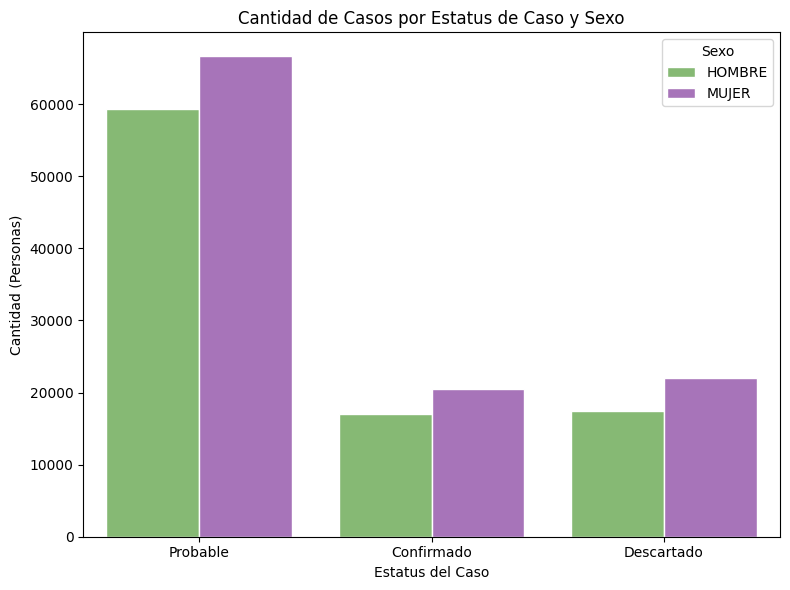

In [42]:
plt.figure(figsize=(8, 6))
sns.barplot(x='ESTATUS_CASO', y='CANTIDAD', hue='SEXO', data=query_estatus_caso_sexo, palette=['#80C469','#AD69C4'], edgecolor = 'white')
plt.xlabel('Estatus del Caso')
plt.ylabel('Cantidad (Personas)')
plt.title('Cantidad de Casos por Estatus de Caso y Sexo')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

## Casos confirmados al largo del tiempo en México

In [62]:
query_hist_confirmado = f''' 
            SELECT 
                DA.FECHA_ACTUALIZACION as Fecha,
                DESCRIPCIÓN
            FROM 
                dengue_abierto as DA
            INNER JOIN 
                CATÁLOGO_ESTATUS_CASO as CEC
            ON 
                DA.ESTATUS_CASO = CEC.CLAVE
            where
                CEC.CLAVE = 2
            order by DA.FECHA_ACTUALIZACION 
             '''


# Ejecutamos nuestro query utilizando nuestro cursor en pandas para convertir nuestra información a un dataframe
query_hist_confirmado = pd.read_sql_query(query_hist_confirmado, conn)
query_hist_confirmado.sample(10)


,Fecha,DESCRIPCIÓN
30607,2023-10-23,CONFIRMADO
24195,2023-10-23,CONFIRMADO
3214,2023-10-23,CONFIRMADO
34151,2023-10-23,CONFIRMADO
8441,2023-10-23,CONFIRMADO
12553,2023-10-23,CONFIRMADO
34105,2023-10-23,CONFIRMADO
17468,2023-10-23,CONFIRMADO
18070,2023-10-23,CONFIRMADO
11654,2023-10-23,CONFIRMADO


In [44]:
print('Fecha maxima: ', query_hist_confirmado['Fecha'].max())
print('Fecha minima: ', query_hist_confirmado['Fecha'].min())

Fecha maxima:  2023-10-23
Fecha minima:  2023-10-23


Aqui ibamos a hacer una serie de tiempo pero todas las fechas de los datos son del 2023

-------------------------------------------------------

# Visualizando mapa con defunciones

In [51]:
import plotly.express as px
import json

with open("./data/mexico_regions.json") as file:
    mexico_regions = json.load(file)

In [89]:
querie_wea_12 = '''
    SELECT COUNT(t1.ID_REGISTRO) as defunciones, t2.ENTIDAD_FEDERATIVA as entidad
    FROM dengue_abierto as t1
    RIGHT JOIN CATÁLOGO_ENTIDAD as t2
    ON t1.ENTIDAD_UM_NOTIF = t2.CLAVE_ENTIDAD
    WHERE t1.DEFUNCION = 1
    GROUP BY t2.ENTIDAD_FEDERATIVA
'''
df_vista2 = pd.read_sql_query(querie_wea_12, conn)

# Modificamos algunos estados que pueden tener nombre diferente
df_vista2["entidad"] = df_vista2["entidad"].str.title()
df_vista2["entidad"] = np.where(df_vista2["entidad"].str.startswith("Coahuila"), "Coahuila", df_vista2["entidad"])
df_vista2["entidad"] = np.where(df_vista2["entidad"].str.startswith("Michoacán"), "Michoacán", df_vista2["entidad"])
df_vista2["entidad"] = np.where(df_vista2["entidad"].str.startswith("Veracruz"), "Veracruz", df_vista2["entidad"])
df_vista2

,defunciones,entidad
0,1,Aguascalientes
1,3,Baja California
2,2,Baja California Sur
3,25,Campeche
4,14,Chiapas
5,3,Ciudad De México
6,15,Coahuila
7,2,Colima
8,6,Guanajuato
9,39,Guerrero


In [90]:
fig = px.choropleth(
    data_frame=df_vista2, 
    geojson=mexico_regions, 
    locations=df_vista2["entidad"], # nombre de la columna del Dataframe
    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
    color=df_vista2["defunciones"], #El color depende de las cantidades
    color_continuous_scale="reds",
    range_color=(df_vista2["defunciones"].min(),
                    df_vista2["defunciones"].max()),
)

fig.update_layout(
    # dragmode=False, # Hacemos que no se pueda arrastrar el mapa
    # scene_camera_eye=dict(x=0),
)

# Template para la carta del hover
salto = "<br>"
hovertemp = "<b>Estado</b>" + salto
hovertemp += "%{location}" + salto
hovertemp += "<b>Casos de dengue</b>" + salto
hovertemp += df_vista2["defunciones"].astype(int).astype(str) + salto

fig.update_traces(
    hovertemplate=hovertemp,
)

fig.update_geos(
    showcountries=False, # No mostrar los otros paises
    showcoastlines=False, # Lineas de paises
    showland=False, # Si lo activamos muestra los otros paises muy tenues
    fitbounds="locations",
    visible=False,   # El marco exterior del mapa
    # zoom_level=5,
)

fig.show()

In [86]:
querie_wea_12 = '''
    SELECT COUNT(t1.ID_REGISTRO) as defunciones, t2.ENTIDAD_FEDERATIVA as entidad
    FROM dengue_abierto as t1
    LEFT JOIN CATÁLOGO_ENTIDAD as t2
    ON t1.ENTIDAD_UM_NOTIF = t2.CLAVE_ENTIDAD
    WHERE t1.DEFUNCION = 1 OR t1.DEFUNCION = 2
    GROUP BY t1.ENTIDAD_UM_NOTIF
'''
df_vista2 = pd.read_sql_query(querie_wea_12, conn)
df_vista2["entidad"] = df_vista2["entidad"].str.title()
df_vista2["entidad"] = np.where(df_vista2["entidad"].str.startswith("Coahuila"), "Coahuila", df_vista2["entidad"])
df_vista2["entidad"] = np.where(df_vista2["entidad"].str.startswith("Michoacán"), "Michoacán", df_vista2["entidad"])
df_vista2["entidad"] = np.where(df_vista2["entidad"].str.startswith("Veracruz"), "Veracruz", df_vista2["entidad"])
df_vista2

fig = px.choropleth(
    data_frame=df_vista2, 
    geojson=mexico_regions, 
    locations=df_vista2["entidad"], # nombre de la columna del Dataframe
    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
    color=df_vista2["defunciones"], #El color depende de las cantidades
    color_continuous_scale="reds",
    range_color=(df_vista2["defunciones"].min(),
                    df_vista2["defunciones"].max()),
)

fig.update_layout(
    # dragmode=False, # Hacemos que no se pueda arrastrar el mapa
    # scene_camera_eye=dict(x=0),
)

# Template para la carta del hover
salto = "<br>"
hovertemp = "<b>Estado</b>" + salto
hovertemp += "%{location}" + salto
hovertemp += "<b>Casos de dengue</b>" + salto
hovertemp += df_vista2["defunciones"].astype(int).astype(str) + salto

fig.update_traces(
    hovertemplate=hovertemp,
)

fig.update_geos(
    showcountries=False, # No mostrar los otros paises
    showcoastlines=False, # Lineas de paises
    showland=False, # Si lo activamos muestra los otros paises muy tenues
    fitbounds="locations",
    visible=False,   # El marco exterior del mapa
    # zoom_level=5,
)

fig.show()